<a href="https://colab.research.google.com/github/Valerie-Fan/python-data-analysis-and-machine-learning/blob/main/sentimental-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset into a DataFrame
file_path = '/content/feedback_sentiment.csv'

df = pd.read_csv(file_path, sep=', ', engine='python')
df.head()

,"""Text",Sentiment,Source,Date/Time,User ID,Location,"Confidence Score"""
0,"""""""I love this product!""""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,"0.85"""
1,"""""""The service was terrible.""""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,"0.65"""
2,"""""""This movie is amazing!""""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,"0.92"""
3,"""""""I'm so disappointed with their customer sup...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,"0.78"""
4,"""""""Just had the best meal of my life!""""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,"0.88"""


## Q1: How many columns are there in this csv file and what are these columns’ names?

In [ ]:
# Display the number of columns and their names
column_count = df.shape[1]
column_names = df.columns.tolist()
print(f"Number of columns: {column_count}")
print(f"Column names: {column_names}")

Number of columns: 7
Column names: ['"Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score"']


## Q2: Processing the dataset

### Data cleaning

In [ ]:
df['"Text'] = df['"Text'].apply(lambda x: x.strip('"'))

# Ensure column names are correct and strip unwanted characters
df.columns = [col.strip().strip('"') for col in df.columns]

# Fill NaN values with a default string to safely apply string operations
df.fillna('', inplace=True)

# Apply stripping of quotation marks safely
df = df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)


# change the feature "Text to Text
df.rename(columns={'"Text': 'Text'}, inplace=True)
df.rename(columns={'Confidence Score"': 'Confidence Score'}, inplace=True)

df.head()

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,I love this product!,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,The service was terrible.,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,This movie is amazing!,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,I'm so disappointed with their customer support.,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,Just had the best meal of my life!,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


### Drop NAN

In [ ]:
# drop null
df.dropna(inplace=True)

df.isna().sum()

Text                0
Sentiment           0
Source              0
Date/Time           0
User ID             0
Location            0
Confidence Score    0
dtype: int64

In [ ]:
# Remove rows where 'Sentiment' is blank or NaN
df = df[df['Sentiment'].notna() & (df['Sentiment'] != '')]

# Verify the cleanup by checking the counts again
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Positive    53
Negative    43
Name: count, dtype: int64

### Converting data

In [ ]:
# Convert 'Date/Time' to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

### Creating new features

In [ ]:
# New features: month, day, and hour
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour

In [ ]:
# Total words and characters
df['Total Words'] = df['Text'].apply(lambda x: len(x.split()))
df['Total Chars'] = df['Text'].apply(len)

# Total words after transformation: natural logarithm of the word count
df['Total Words After Transformation'] = df['Total Words'].apply(np.log)

df.head()

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Month,Day,Hour,Total Words,Total Chars,Total Words After Transformation
0,I love this product!,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,6,15,9,4,20,1.386294
1,The service was terrible.,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,6,15,11,4,25,1.386294
2,This movie is amazing!,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92,6,15,14,4,22,1.386294
3,I'm so disappointed with their customer support.,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78,6,15,17,7,48,1.945910
4,Just had the best meal of my life!,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88,6,16,8,8,34,2.079442


## Q3: Visualization

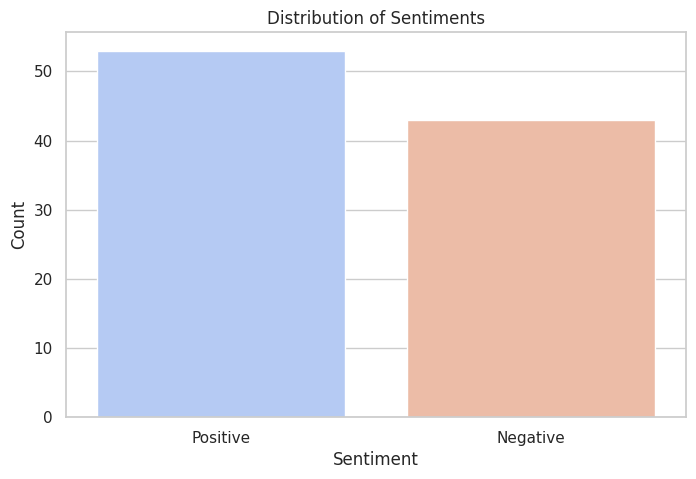

In [ ]:
# Setting up the visual aesthetics for the plots
sns.set(style="whitegrid")

# Visualization 1: Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

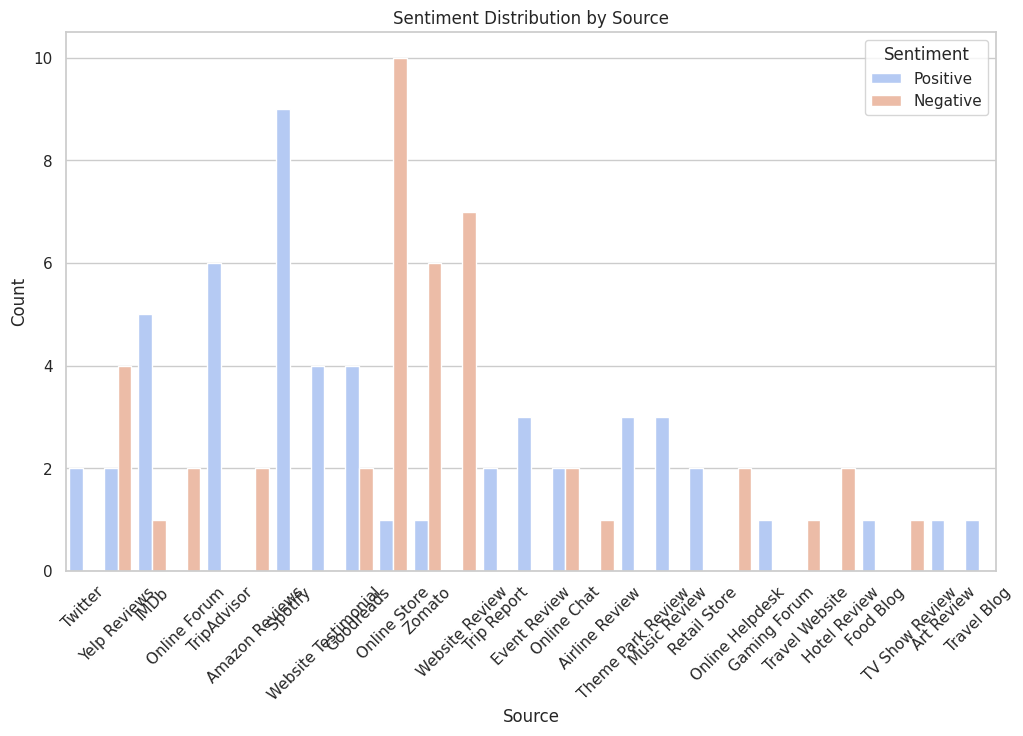

In [ ]:
# Visualization 2: Sentiment by Source
plt.figure(figsize=(12, 7))
sns.countplot(x='Source', hue='Sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

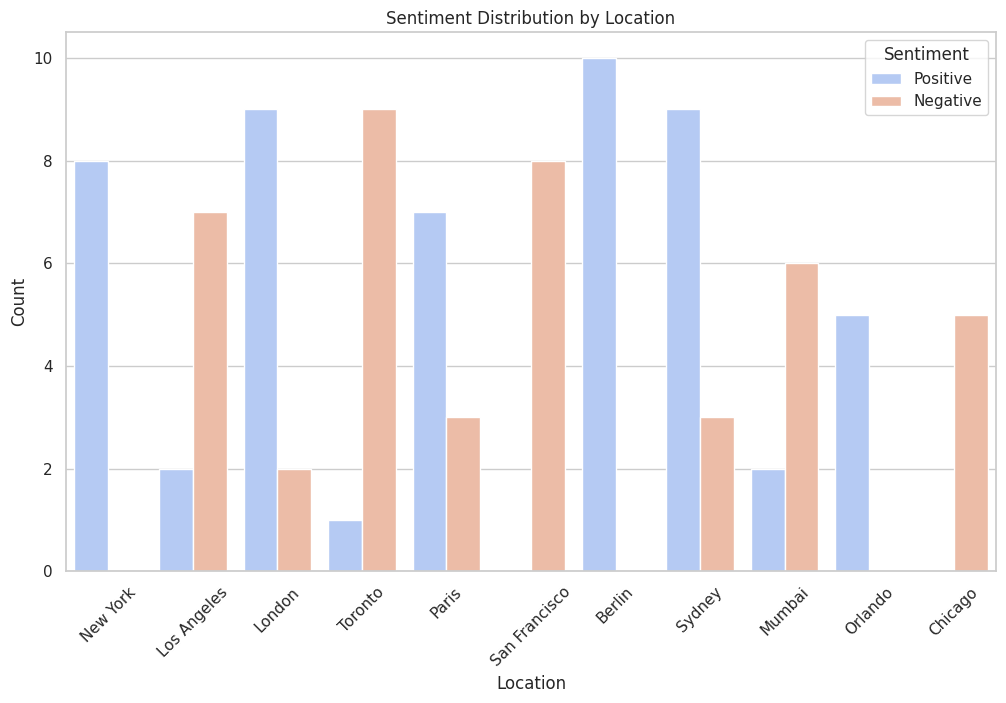

In [ ]:
# Visualization 3: Sentiment by Location
plt.figure(figsize=(12, 7))
sns.countplot(x='Location', hue='Sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

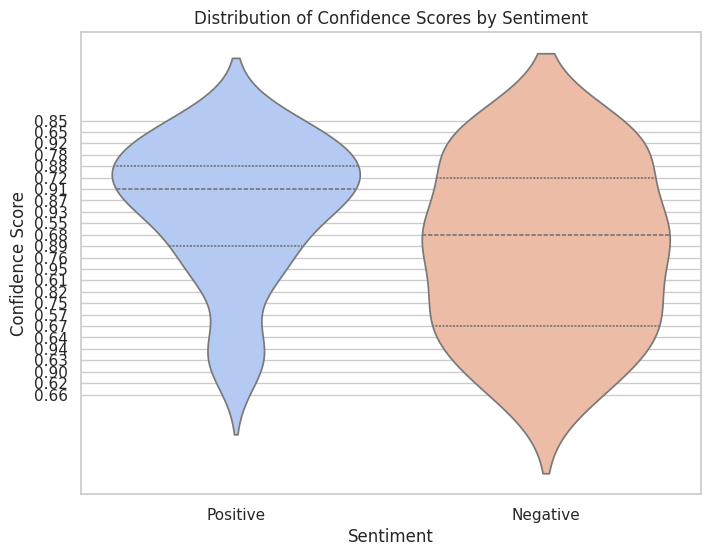

In [ ]:
# Visualization 4: Confidence Score by Sentiment
plt.figure(figsize=(8, 6))
sns.violinplot(x='Sentiment', y='Confidence Score', data=df, palette='coolwarm', inner='quartile')
plt.title('Distribution of Confidence Scores by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Confidence Score')
plt.show()

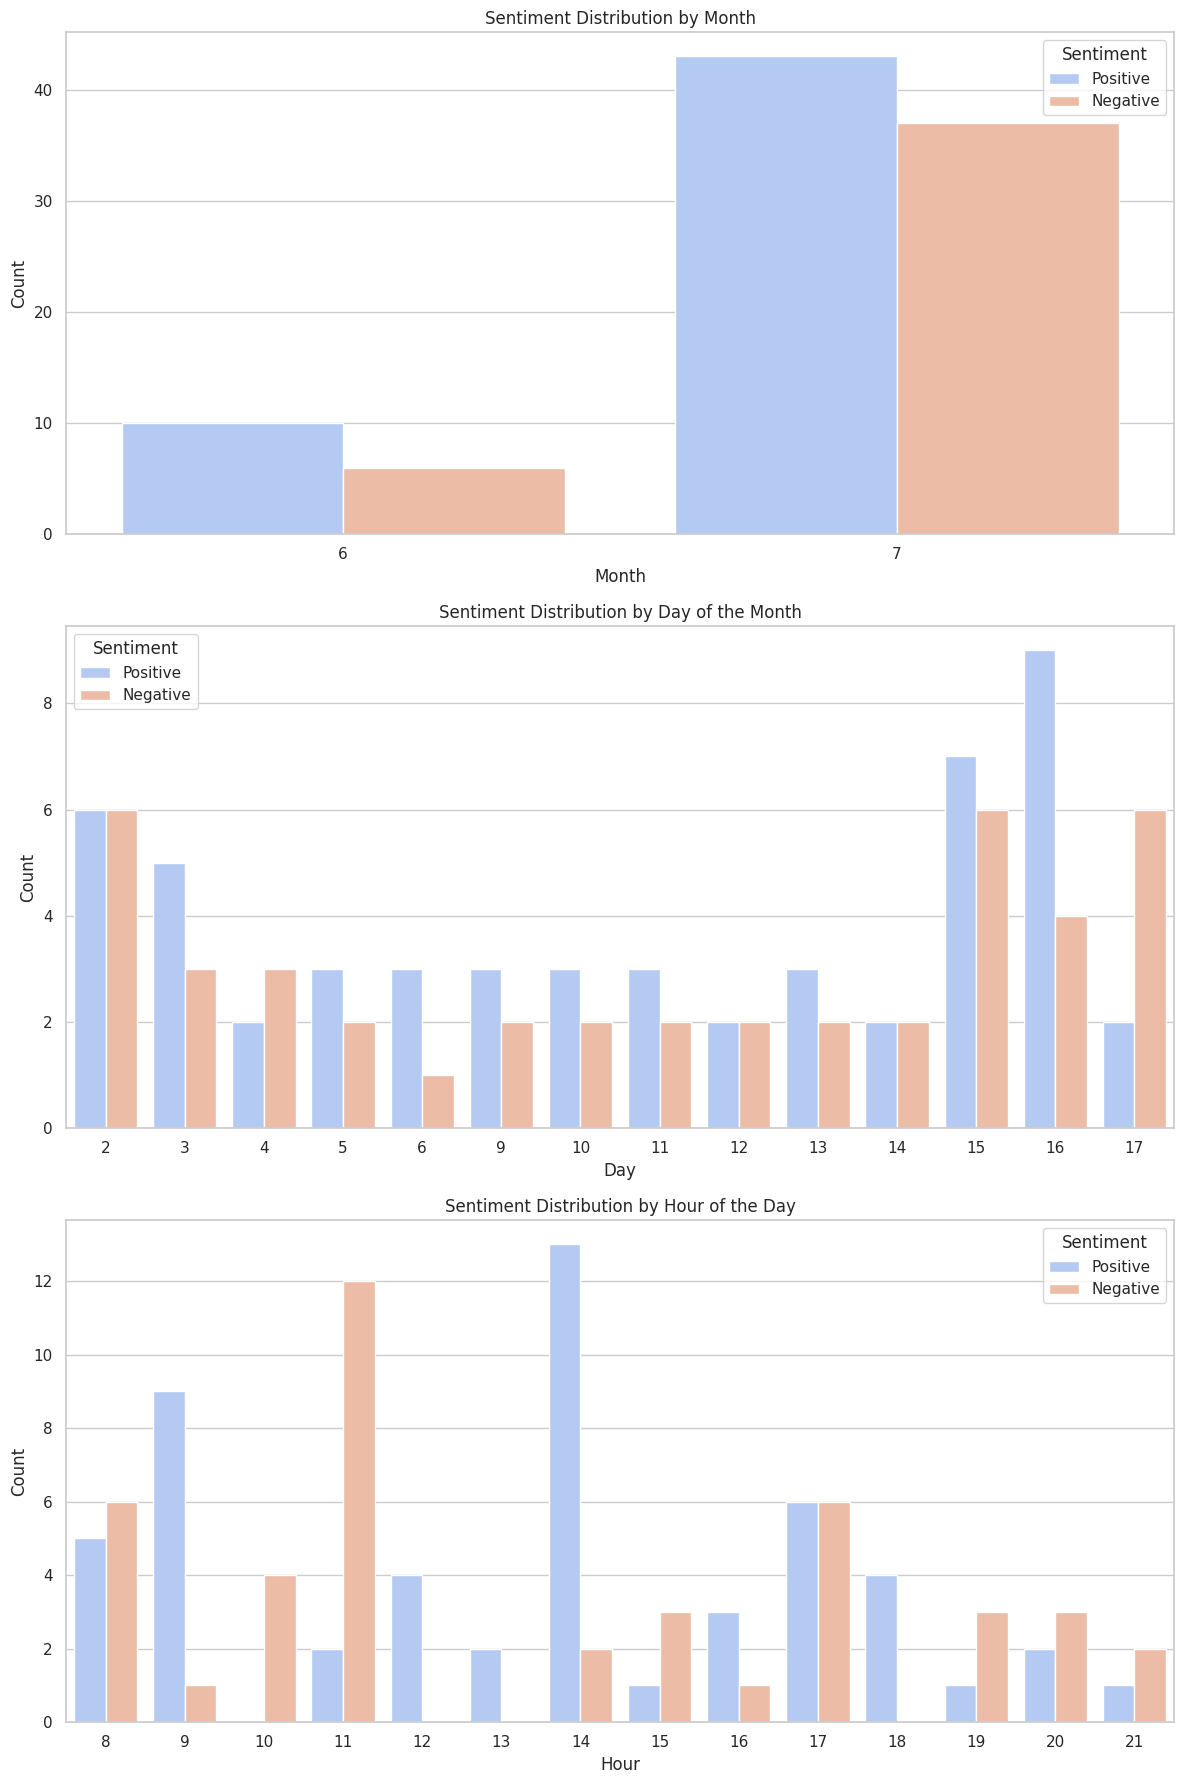

In [ ]:
# Setting up the figures for plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Visualization 5: Sentiment by Month
sns.countplot(ax=axes[0], x='Month', hue='Sentiment', data=df, palette='coolwarm')
axes[0].set_title('Sentiment Distribution by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')
axes[0].legend(title='Sentiment')

# Visualization 6: Sentiment by Day
sns.countplot(ax=axes[1], x='Day', hue='Sentiment', data=df, palette='coolwarm')
axes[1].set_title('Sentiment Distribution by Day of the Month')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')
axes[1].legend(title='Sentiment')

# Visualization 7: Sentiment by Hour
sns.countplot(ax=axes[2], x='Hour', hue='Sentiment', data=df, palette='coolwarm')
axes[2].set_title('Sentiment Distribution by Hour of the Day')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Count')
axes[2].legend(title='Sentiment')

plt.tight_layout()
plt.show()

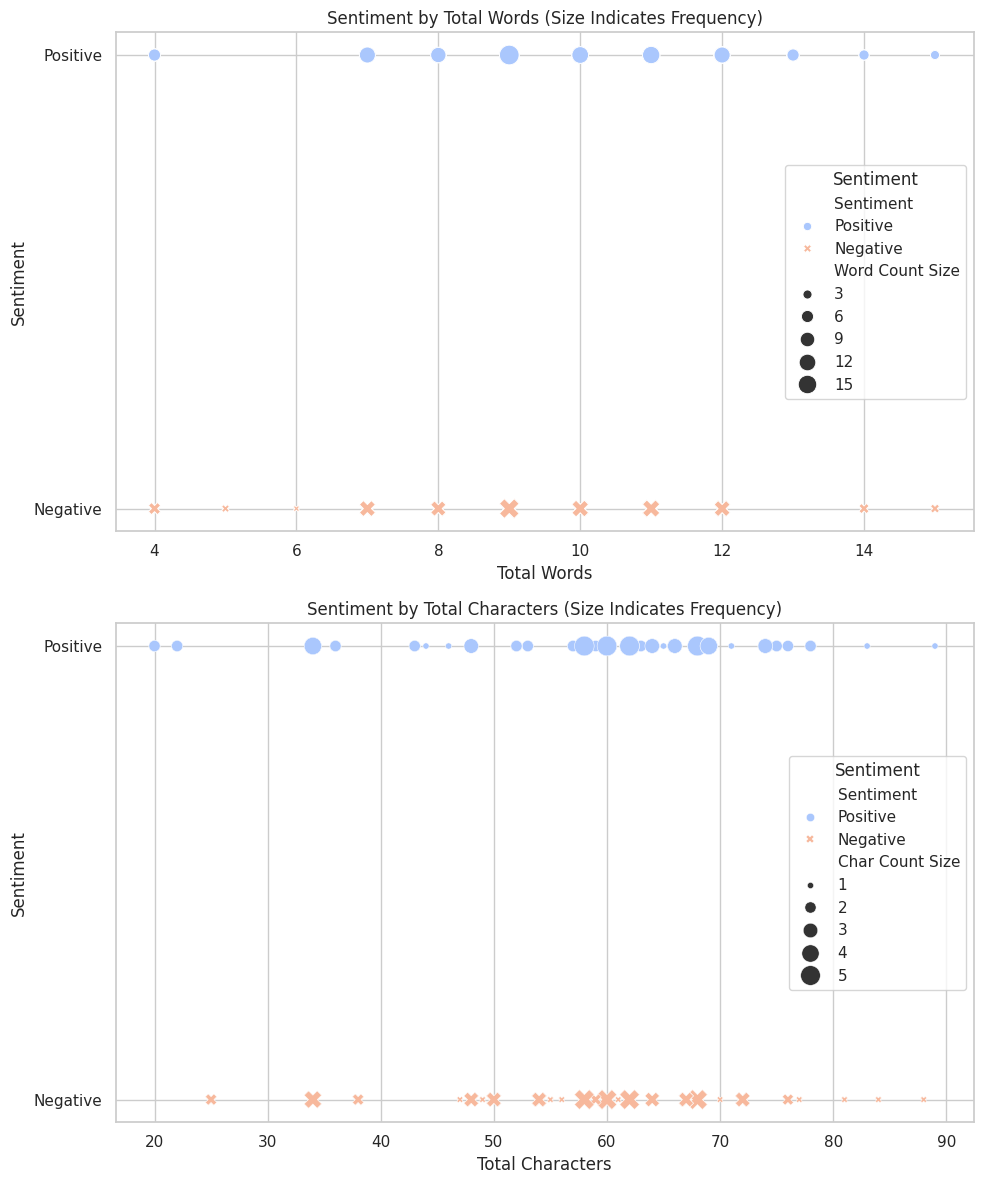

In [ ]:
# Calculate frequencies for sizing the scatter points
word_counts = df['Total Words'].value_counts()
char_counts = df['Total Chars'].value_counts()

# Map the frequencies to the DataFrame for point sizes
df['Word Count Size'] = df['Total Words'].map(word_counts)
df['Char Count Size'] = df['Total Chars'].map(char_counts)

# Setting up the figures for plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Visualization 8: Total Words by Sentiment with sizes
sns.scatterplot(ax=axes[0], x='Total Words', y='Sentiment', size='Word Count Size', sizes=(20, 200),
                data=df, hue='Sentiment', style='Sentiment', palette='coolwarm')
axes[0].set_title('Sentiment by Total Words (Size Indicates Frequency)')
axes[0].set_xlabel('Total Words')
axes[0].set_ylabel('Sentiment')
axes[0].legend(title='Sentiment')

# Visualization 9: Total Chars by Sentiment with sizes
sns.scatterplot(ax=axes[1], x='Total Chars', y='Sentiment', size='Char Count Size', sizes=(20, 200),
                data=df, hue='Sentiment', style='Sentiment', palette='coolwarm')
axes[1].set_title('Sentiment by Total Characters (Size Indicates Frequency)')
axes[1].set_xlabel('Total Characters')
axes[1].set_ylabel('Sentiment')
axes[1].legend(title='Sentiment')

plt.tight_layout()
plt.show()

In [ ]:
from wordcloud import WordCloud

# Setting up the word clouds for both Positive and Negative sentiments
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Concatenate all texts for each sentiment category
negative_text = " ".join(df.loc[df['Sentiment'] == 'Negative', 'Text'])
positive_text = " ".join(df.loc[df['Sentiment'] == 'Positive', 'Text'])

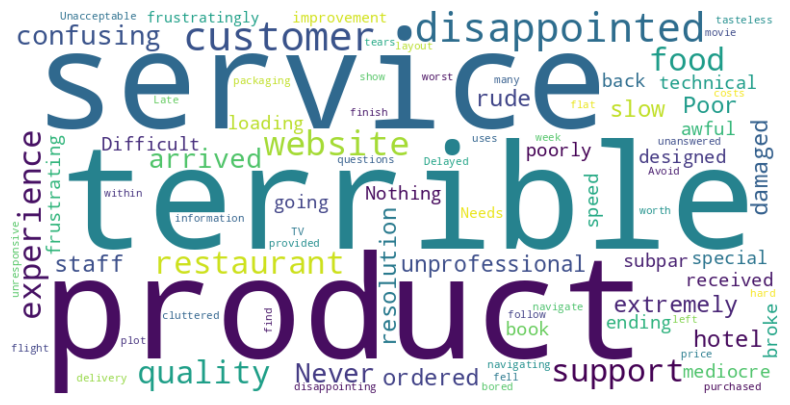

In [ ]:
# Visualization 10: Generate word cloud for Negative sentiment
generate_wordcloud(negative_text)

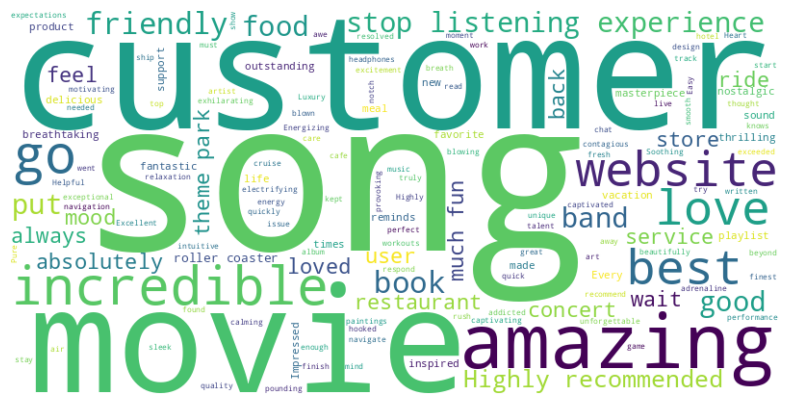

In [ ]:
# Visualization 11: Generate word cloud for Positive sentiment
generate_wordcloud(positive_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


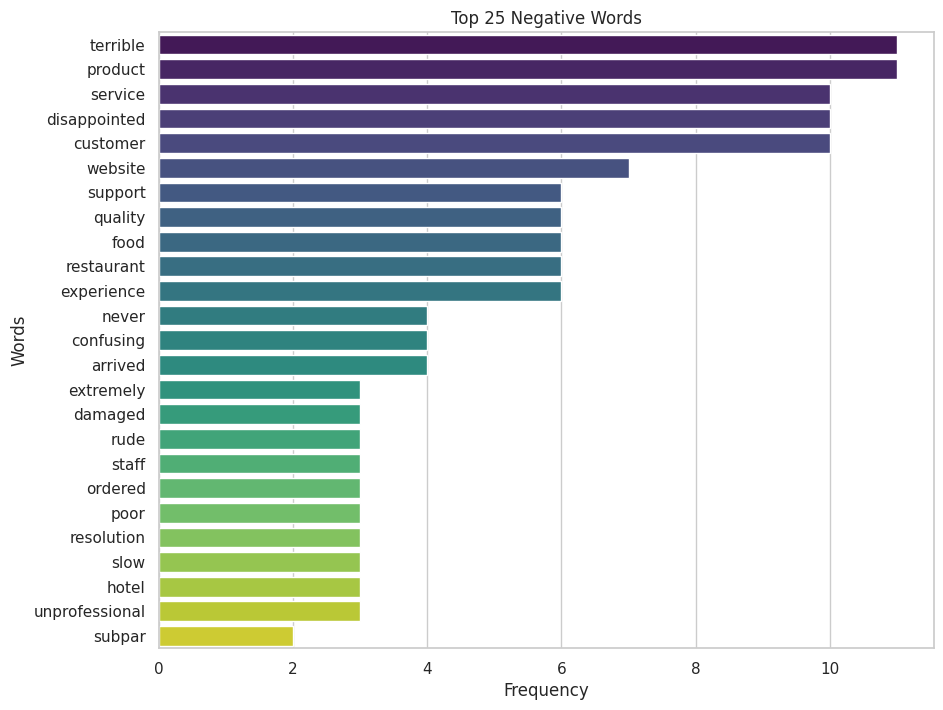

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def get_top_words(text, top_n=25):
    words = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(top_n)

# Assuming 'negative_text' is a string containing all the negative texts combined
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['Text'])
top_negative_words = get_top_words(negative_text, 25)

# Assuming 'top_negative_words' is a list of tuples with (word, frequency)
words, frequencies = zip(*top_negative_words)  # Unzip the list of tuples

# Create a bar plot for the top 25 negative words
plt.figure(figsize=(10, 8))
sns.barplot(x=list(frequencies), y=list(words), palette='viridis')
plt.title('Top 25 Negative Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

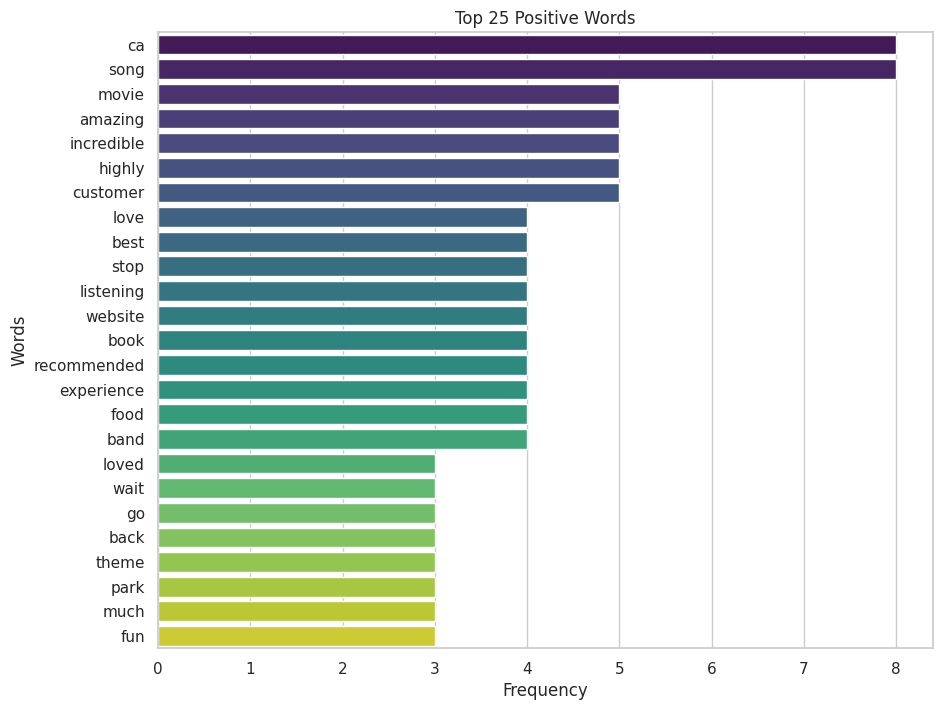

In [ ]:
# Assuming 'positive_text' is all the positive texts combined
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Text'])
top_positive_words = get_top_words(positive_text, 25)

# Extract words and frequencies for plotting
words, frequencies = zip(*top_positive_words)

# Create a bar plot for the top 25 positive words
plt.figure(figsize=(10, 8))
sns.barplot(x=list(frequencies), y=list(words), palette='viridis')
plt.title('Top 25 Positive Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

## Q4 and Q5: Build classification models

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

### Data Preproccessing

In [ ]:
# Data Preprocessing
# Encoding the target variable
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Vectorizing the text data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf_vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In [ ]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [ ]:
# Define the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Grid search parameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Setup the grid search
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'C': 10, 'solver': 'saga'}
Best Score: 0.9466666666666667


In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.80      0.89        15

    accuracy                           0.85        20
   macro avg       0.81      0.90      0.83        20
weighted avg       0.91      0.85      0.86        20



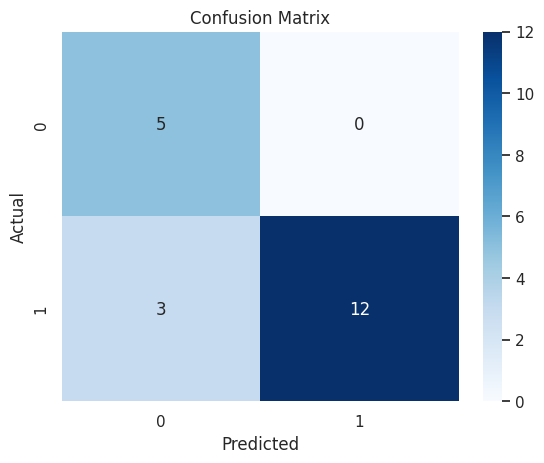

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN regression model
knn = KNeighborsClassifier()

# Grid search parameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Setup the grid search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.8283333333333334


In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.93      0.97        15

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.94        20
weighted avg       0.96      0.95      0.95        20



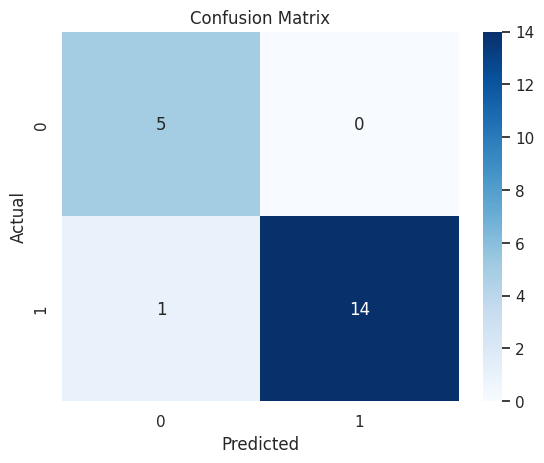

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC

# Define the SVC regression model
svc = SVC()

# Grid search parameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Setup the grid search
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9466666666666667


In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.87      0.93        15

    accuracy                           0.90        20
   macro avg       0.86      0.93      0.88        20
weighted avg       0.93      0.90      0.90        20



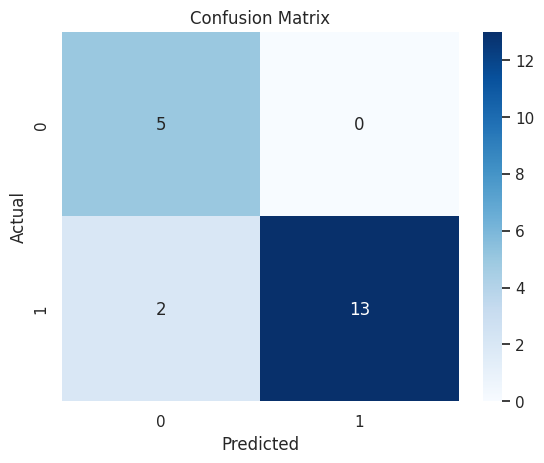

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Define the Gaussian Naive Bayes model
gnb = GaussianNB()

# Grid search parameters
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train.toarray(), y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.9475


In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test.toarray())

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.93      0.97        15

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.94        20
weighted avg       0.96      0.95      0.95        20



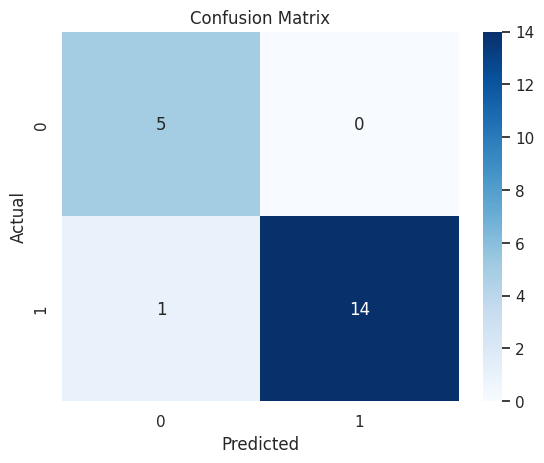

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Define the Multinomial Naive Bayes model
mnb = MultinomialNB()

# Grid search parameters
param_grid = {
    'alpha': [0.1, 1, 10, 100]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'alpha': 0.1}
Best Score: 0.8683333333333334


In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.80      0.89        15

    accuracy                           0.85        20
   macro avg       0.81      0.90      0.83        20
weighted avg       0.91      0.85      0.86        20



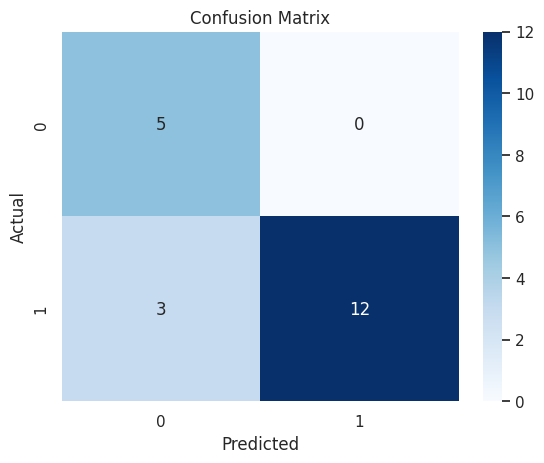

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree model
dt = DecisionTreeClassifier()

# Grid search parameters
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8949999999999999


In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.73      0.85        15

    accuracy                           0.80        20
   macro avg       0.78      0.87      0.78        20
weighted avg       0.89      0.80      0.81        20



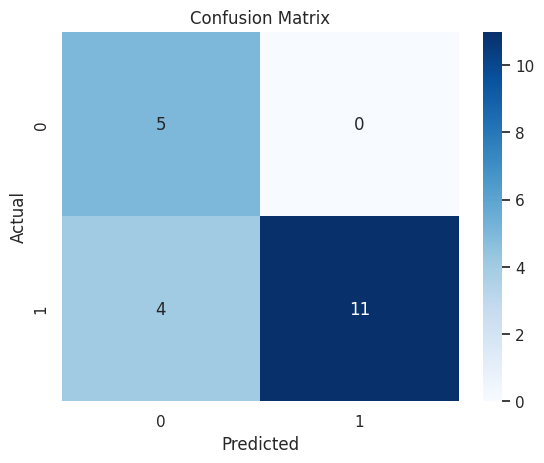

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf = RandomForestClassifier()

# Grid search parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Setup the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9083333333333334


In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.80      0.89        15

    accuracy                           0.85        20
   macro avg       0.81      0.90      0.83        20
weighted avg       0.91      0.85      0.86        20



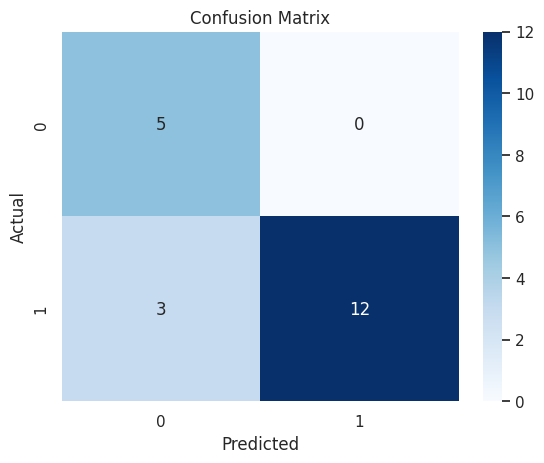

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### XGB

In [ ]:
from xgboost import XGBClassifier

# Define the XGB model
xgb = XGBClassifier()

# Grid search parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}
# Setup the grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.8808333333333334


In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.91      0.67      0.77        15

    accuracy                           0.70        20
   macro avg       0.68      0.73      0.67        20
weighted avg       0.79      0.70      0.72        20



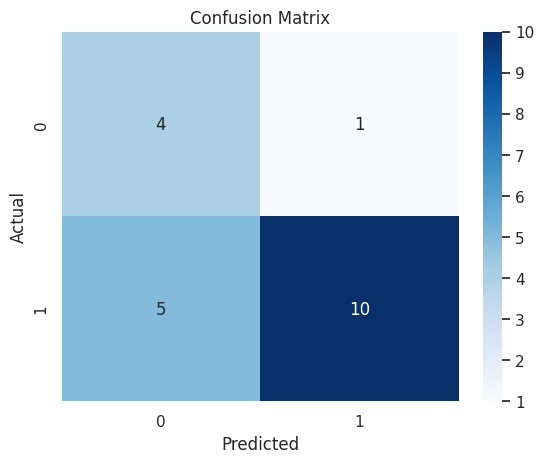

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()